# Aviation Accident Analysis

![Airplane](images/pexels-pixabay-358319.jpg)

### Overview
Our company is launching a new airline division that is focused on buying 
and operating airplanes for commercial and private enterprises.
I was tasked with analysing the aviation accident data from 1919 to 2023
to find the safest and lowest-risk models for our first fleet purchase

![plane](images/pexels-pixabay-163792.jpg)

### Project Goal
The goal of this project is to examine aviation accident data from 1919 to 2023 to measure and rank safety risks. We will gather and study this data to identify the most dangerous operators and aircraft types. e will use those findings to recommend the safest models for the company's initial fleet purchase.


![nightplane](images/pexels-pixabay-99567.jpg)

### Business Problem
Our company is launching a new division that is focused on buying and operating airplanes for commercial and private enterprises. Since we lack experience in this area, my goal is to reduce risks associated with this venture. I am examining aviation accident data from 1919 to 2023 to find the safest and lowest-risk aircraft models for our first fleet purchase. I will turn my findings into actionable insights for the head of the new aviation division to use.



#### Objectives
- *Analyse highest & lowest fatality count caused by each type of aircraft*

- *Analyse the highest & lowest fatality rate of each operator*

- *Analyse countries that are at high risk ofhaving accidents*

## Data Loading


In [2]:
# Importing standard library packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the dataset
df = pd.read_csv('aviation-accident-data-2023-05-16.csv')
df.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


In [4]:
# checking the type of the datset
type(df)

pandas.core.frame.DataFrame

In [5]:
# displays information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


## Data Cleaning
In data cleaning, I check for duplicated files and drop them, and then I check for columns that have missing values. If data happens to be missing, the percentage of missing data is calculated inorder to know if the data can be filled or  the column should be dropped.

### Check and remove duplicated values

In [59]:
# checks the first 10 duplicated values
df[df.duplicated()].head(20)

,date,type,registration,operator,fatalities,location,country,cat,year
708,10-MAY-1940,Junkers Ju-52/3m,LZ-...,German AF,0.0,Rijksweg 13,Netherlands,A1,1940


In [7]:
# this checks the number of duplicated values(True) and non-duplicates(False)
df.duplicated().value_counts()

False    23852
True       115
Name: count, dtype: int64

In [8]:
# Dropping all duplicated values
df = df.drop_duplicates()

In [9]:
# confirming all duplicates have been dropped
df.duplicated().value_counts()

False    23852
Name: count, dtype: int64

#### Check for missing values

In [10]:
# Displays all columns and which of them have missing values.
df.isna().sum()

date               0
type               0
registration    1434
operator           4
fatalities      3833
location         932
country            0
cat                0
year               0
dtype: int64

### Check the present values percentage

In this section, we are checking for the percentage of present values in each column, so that we can determine if they could be filled or they are to be dropped.

In [11]:
percentage_registration = 22419/23967 * 100
percentage_registration

93.54111903867818

In [12]:
percentage_operator = 23963/23967 * 100
percentage_operator

99.98331038511287

In [13]:
percentage_fatalities = 20029/23967 * 100
percentage_fatalities

83.56907414361415

In [14]:
percentage_location = 23019/23967 * 100
percentage_location

96.04456127174865

### Displaying and filling missing values
Here we check for missing values and decide which is the best way to fill the data, for numerical data, median and mean is used while for categorical data, mode is used.

In [15]:
df['fatalities'].value_counts()

fatalities
0         10705
2          1117
1          1005
3           968
4           873
          ...  
135+ 7        1
77+ 1         1
1+ 32         1
271+ 2        1
50+ 3         1
Name: count, Length: 369, dtype: int64

In [16]:
# converting strings to numbers
def stringtonum(x):
    if pd.isna(x):
        return None
    x = str(x)
    if '+' in x:
        return int(x.split('+')[0])
    else:
        return int(float(x))

In [17]:
# replaces all the strings in the fatalities columns to integers
df['fatalities'] = df['fatalities'].apply(stringtonum)

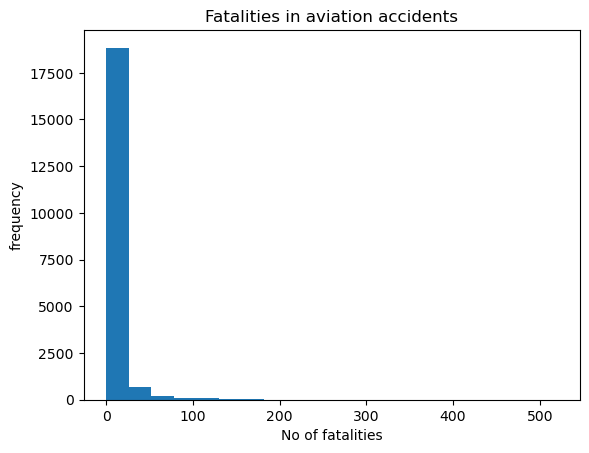

In [18]:
# fatalities histogram to check if it is symmetrical or skewed
plt.hist(df['fatalities'], bins=20)
plt.title('Fatalities in aviation accidents')
plt.xlabel('No of fatalities')
plt.ylabel('frequency')
plt.show()

In [19]:
# Displays unique items in the fatalities column
df['fatalities'].value_counts()

fatalities
0.0      10799
2.0       1140
1.0       1023
3.0        995
4.0        892
         ...  
134.0        1
256.0        1
290.0        1
259.0        1
224.0        1
Name: count, Length: 197, dtype: int64

In [20]:
# calculates and stores the median in the fatalities_median variable
fatalities_median = df['fatalities'].median()
fatalities_median

0.0

In [21]:
# replaces all missing values with the median value
df['fatalities'] = df['fatalities'].fillna(fatalities_median)

In [22]:
# confirms that fatalities has been filled.
df.isna().sum()

date               0
type               0
registration    1434
operator           4
fatalities         0
location         932
country            0
cat                0
year               0
dtype: int64

In [23]:
# Displays all unique values in the registration column
df['registration'].value_counts()

registration
LZ-...     13
-          11
unreg.      6
39          5
48          4
           ..
52-5881     1
HJ250       1
11073       1
45-879      1
D-CGFQ      1
Name: count, Length: 21962, dtype: int64

In [24]:
# calculates and stores the mode in reg_mode variable
reg_mode = df['registration'].mode()[0]
reg_mode

'LZ-...'

In [25]:
# replaces all missing values with the mode
df['registration'] = df['registration'].fillna(reg_mode)

In [26]:
# confirms the missing values have been filled
df.isna().sum()

date              0
type              0
registration      0
operator          4
fatalities        0
location        932
country           0
cat               0
year              0
dtype: int64

In [27]:
# displays unique values in the location column
df['location'].value_counts()

location
unknown                272
Havana-JosÃ© Mar...    105
Miami Internatio...     71
Beirut Internati...     48
New York-John F....     44
                      ... 
near Damroh              1
Puerto Columbia          1
Moskva-Khodynka ...      1
near Byelaya Noch        1
Hohn Air Base            1
Name: count, Length: 14608, dtype: int64

In [28]:
# calculates and stores the mode in the location_mode variable
location_mode = df['location'].mode()[0]
location_mode

'unknown'

In [29]:
# replaces the missing values with the mode
df['location'] = df['location'].fillna(location_mode)

In [30]:
# confirms missing values are filled
df.isna().sum()

date            0
type            0
registration    0
operator        4
fatalities      0
location        0
country         0
cat             0
year            0
dtype: int64

In [31]:
# displays unique values in the operator column
df['operator'].value_counts()

operator
USAAF                          2604
USAF                           1118
RAF                             920
US Navy                         745
German AF                       411
                               ... 
BAFIN                             1
Dow Chemical Company              1
Aero Bellavista                   1
Pacific Missionary Aviation       1
Bar Aviation                      1
Name: count, Length: 6017, dtype: int64

In [32]:
# calculates and stores the mode in the operator_mode variable
operator_mode = df['operator'].mode()[0]
operator_mode

'USAAF'

In [33]:
# fills the missing values with the mode
df['operator'] = df['operator'].fillna(operator_mode)

In [34]:
# confirms all missing values have been replaced
df.isna().sum()

date            0
type            0
registration    0
operator        0
fatalities      0
location        0
country         0
cat             0
year            0
dtype: int64

In [35]:
# saves the clean dataset.
df.to_csv('clean-aviation-accident-data.csv', index=False)

# Data Analysis

### Highest fatality count by aircraft type
This analysis tells us which aircraft type has the highest fatality rate. By identifying this, this report gives the company the necessary data for the company to make the safest decision that will benefit both the comapny and he clients.

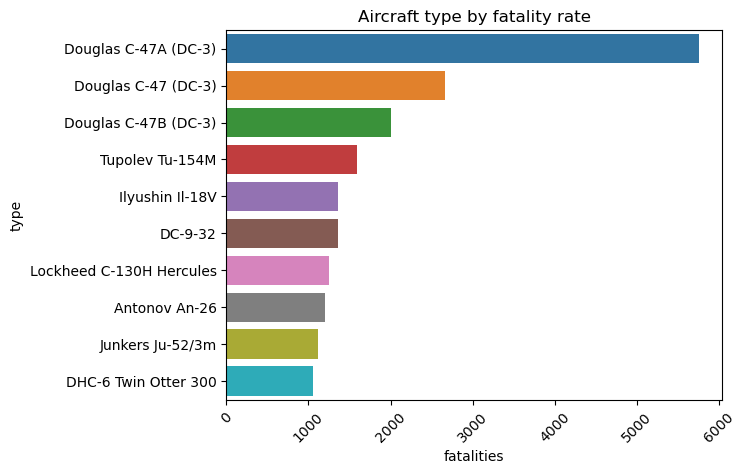

In [60]:
# groups all fatalities by aircraft type and sums all fatalities for each type
aircrafttype_accidents= df.groupby('type')['fatalities'].sum().reset_index()
High_accident = aircrafttype_accidents.sort_values(by='fatalities', ascending=False).head(10)


# use seaborn to plot 
sns.barplot(
    x = 'fatalities',
    y = 'type',
    data= High_accident
)
plt.title('Aircraft type by fatality rate')
plt.xticks(rotation = 45)
plt.show()

### Lowest fatality count by aircraft type
This analysis tells us the safest aircraft types that have a fatality count lower or equal to 5. It shows us the safest aircrafts to pick that will be necessary for our company's and clients safety. 

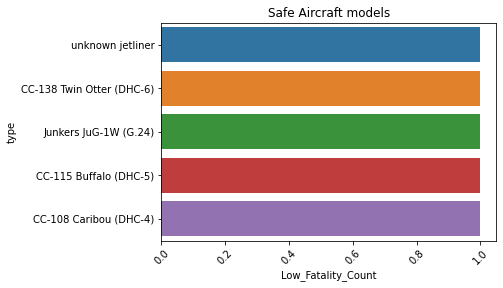

In [21]:
#low_accident_df = df[df['fatalities'] == 0]

safe_aircraft_types = df.groupby('type').size().reset_index(name='Low_Fatality_Count')

safe_aircraft_types = safe_aircraft_types[safe_aircraft_types['Low_Fatality_Count']<=5].sort_values(
    by='Low_Fatality_Count', ascending=True
).head()


sns.barplot(
    x='Low_Fatality_Count',
    y='type',
    data= safe_aircraft_types
)
plt.title('Safe Aircraft models')
plt.xticks(rotation=45)
plt.show()




### Highest fatality count by operator
This analysis shows the top operators involved in the highest fatalities. This is crucial for our company when looking for operators as we will look for clients whose safety records are not of risk, ensuring they are not a liability.

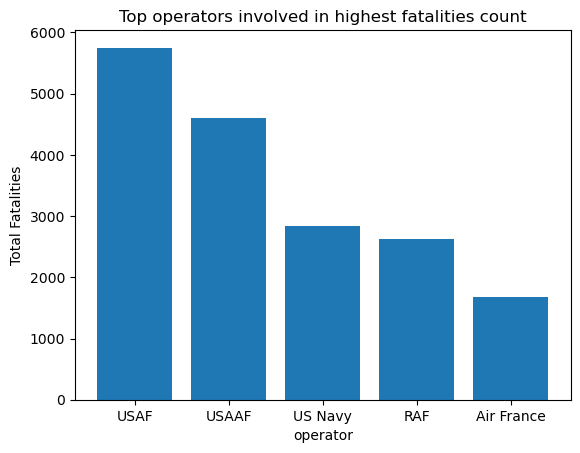

In [62]:
# groups all fatalities and operators and sums all fatalities with each operator
operator_fatalities = df.groupby('operator')['fatalities'].sum()

top_fatal_operators = operator_fatalities.sort_values(ascending=False).head(5)

# use matplotlib to plot
plt.bar(top_fatal_operators.index, top_fatal_operators.values)
plt.title('Top operators involved in highest fatalities count')
plt.xlabel('operator')
plt.ylabel('Total Fatalities')
plt.show()

# Lowest fatality count by Operators
This analysis helps us filter the safest operators by picking the operators with less than 5 fatalities. They are of the lowest risk to the company and clients.

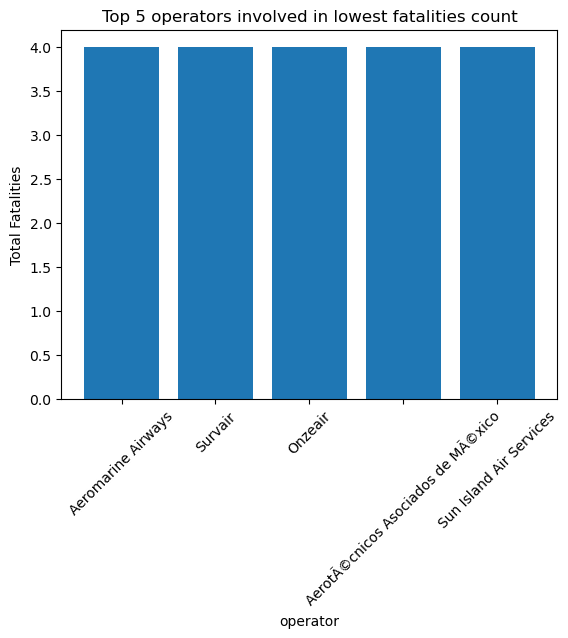

In [61]:
# groups all fatalities and operators and sums all fatalities with each operator.
safest_operators = df.groupby('operator')['fatalities'].sum().reset_index(name='Safe_operators')
# filters and sorts to only show operators with less than 5 fatalities.
top_fatal_operators = safest_operators[safest_operators['Safe_operators']< 5].sort_values(by= 'Safe_operators',
                                                                    ascending=False).head(5)

# use matplotlib to plot
plt.bar(top_fatal_operators['operator'], top_fatal_operators['Safe_operators'])
plt.title('Top 5 operators involved in lowest fatalities count')
plt.xlabel('operator')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=45)
plt.show()

### High risk countries
This analysis shows the country that are at high risk of having accidents. This is important cause it tells the company which countries are safer and which countries need a greater safety approach when travelling there.

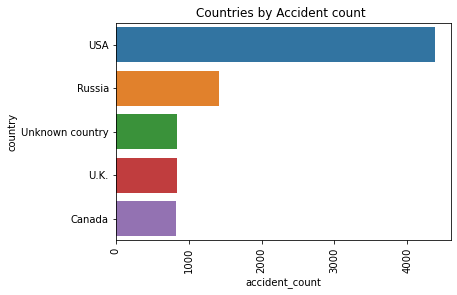

In [19]:
# group all countries and accident_count and sum all accidents in each country
country_fatality_count= df.groupby('country').size().reset_index(name='accident_count')
high_risk_countries = country_fatality_count.sort_values(by='accident_count', ascending=False).head()

sns.barplot(
    x= 'accident_count',
    y= 'country',
    data= high_risk_countries
)
plt.title('Countries by Accident count ')
plt.xticks(rotation= 90)
plt.show()

## Conclusion
This analysis shows us that the aviation industry is a risky endeavour. We have decided to exlude the Douglas C-47A (DC-3) as it has the biggest risk to our company. The high-risk countries show areas that need closer examination like the USA, which may have alot of operational activity, hence the rise in accident rates. Finally the operator analysis gives us a safety benchmark that gives direction to our company in which operators are suited.

## Recommendation
- **Safe-Aircraft-Purchase:**
The Douglas C-47A(DC-3) should not be considered when purchasing aircrafts, since it carries the highest fatality count and therefore will be a risk to the company and our clients. The company should look into the aircrafts with the lowest fatality count as they are the safer bet for the new airline division.

- **Low-risk-Operators:**
The company should prioritize operators that have the lowest fatality rates cause they are less risky than the operators who have high fatality counts.

- **Safety-measures-for-high-risk-countries:**
We should look for more safety measures when operating in countries that are at high risk of having airplane accidents instead of exluding them. This is cause they may have more flights therefore may be prone to more airline accidents

